###  Corona vaccine progress 
version 0.5

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-28 02:56:21.000991


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountries = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url
27,Israel,2020-12-26,Pfizer/BioNTech,279300,https://www.gov.il/he/departments/news/2712202...
3,Bahrain,2020-12-26,Sinopharm,51556,https://twitter.com/MOH_Bahrain/status/1342912...
43,United States,2020-12-26,"Moderna, Pfizer/BioNTech",1944585,https://covid.cdc.gov/covid-data-tracker/#vacc...
17,Chile,2020-12-26,Pfizer/BioNTech,8324,https://deis.minsal.cl/
2,Bahrain,2020-12-25,Sinopharm,50543,https://twitter.com/MOH_Bahrain/status/1342560...
16,Chile,2020-12-25,Pfizer/BioNTech,5188,https://deis.minsal.cl/
34,Russia,2020-12-25,Sputnik V,700000,https://tass.com/world/1240003
26,Israel,2020-12-25,Pfizer/BioNTech,247300,https://www.gov.il/he/departments/news/2712202...
25,Israel,2020-12-24,Pfizer/BioNTech,208600,https://www.gov.il/he/departments/news/2712202...
15,Chile,2020-12-24,Pfizer/BioNTech,420,https://deis.minsal.cl/


In [4]:
#Countries in list
allCountries["location"].value_counts()

Canada              11
Israel               7
United States        5
Bahrain              4
Russia               4
Chile                3
Northern Ireland     2
Wales                2
United Kingdom       2
Scotland             2
China                1
England              1
Mexico               1
Costa Rica           1
Name: location, dtype: int64

In [5]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    4
Canada            Pfizer/BioNTech             11
Chile             Pfizer/BioNTech              3
China             CNBG, Sinovac                1
Costa Rica        Pfizer/BioNTech              1
England           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech              7
Mexico            Pfizer/BioNTech              1
Northern Ireland  Pfizer/BioNTech              2
Russia            Sputnik V                    4
Scotland          Pfizer/BioNTech              2
United Kingdom    Pfizer/BioNTech              2
United States     Moderna, Pfizer/BioNTech     2
                  Pfizer/BioNTech              3
Wales             Pfizer/BioNTech              2
dtype: int64

In [6]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 43
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            39 non-null     object        
 1   date                39 non-null     datetime64[ns]
 2   vaccine             39 non-null     object        
 3   total_vaccinations  39 non-null     int64         
 4   source_url          39 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.8+ KB


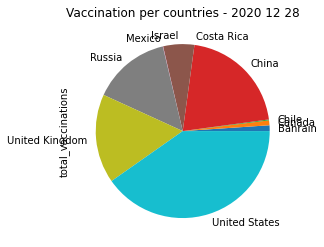

In [7]:
#Countries
%matplotlib inline    
import matplotlib.pyplot as plt   

#Reported numbers are accumulated --> get latest
plotCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine']].groupby('location').apply(lambda x: x.head(1))
plotCountries = plotCountries.set_index('location')
plotCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperCountry.png')  
plt.show() 


In [8]:
plotCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine
location,,
Costa Rica,55,Pfizer/BioNTech
Mexico,2924,Pfizer/BioNTech
Chile,8324,Pfizer/BioNTech
Canada,43525,Pfizer/BioNTech
Bahrain,51556,Sinopharm
Israel,279300,Pfizer/BioNTech
Russia,700000,Sputnik V
United Kingdom,800000,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"


In [9]:
plotCountries.sum()

total_vaccinations                                              4830269
vaccine               SinopharmPfizer/BioNTechPfizer/BioNTechCNBG, S...
dtype: object

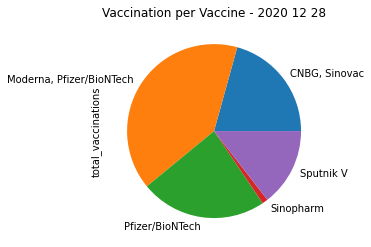

In [10]:
# Vaccine numbers
plotVaccine = plotCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperVaccine.png')  
plt.show()

In [11]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     51556
Sputnik V                    700000
CNBG, Sinovac               1000000
Pfizer/BioNTech             1134128
Moderna, Pfizer/BioNTech    1944585
Name: total_vaccinations, dtype: int64

In [12]:
# Sweden have 10 000 doses....

In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-28 02:56:22.542069
Time elapsed (hh:mm:ss.ms) 0:00:01.541490


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata
* "translates" the labels to Wikidata Qnumber see reconciliationCountries_dict 

In [14]:
reconciliationCountries_dict = {
    "Bahrain" : "Q398", "Belarus" : "Q184","Canada" : "Q16",    "China" : "Q148",
    "Chile" : "Q298", "Costa Rica" : "Q800", "Israel" : "Q801", "Mexico" : "Q96",
    "France" : "Q142","Germany" : "Q183",
    "Russia" : "Q159","United Kingdom" : "Q145", "United States" : "Q30",
    "Hungary": "Q28"}
reconciliationCountries = pd.DataFrame.from_dict([reconciliationCountries_dict]).T
reconciliationCountries.columns = ["WD"]
reconciliationCountries.index.name = "Country"

In [15]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sBb
queryWD = """SELECT DISTINCT (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU)  (SAMPLE(?democracy) AS ?democracy) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?cid wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?cid wdt:P1081 ?Human_Development_Index. }
  BIND (exists{?cid wdt:P463 wd:Q458} AS ?memberEU)
  BIND (exists{?cid wdt:P122/wdt:P279* wd:Q7174} AS ?democracy)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
  }

SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   continent                195 non-null    object
 1   memberEU                 195 non-null    object
 2   democracy                195 non-null    object
 3   country                  195 non-null    object
 4   qid                      195 non-null    object
 5   population               195 non-null    object
 6   ISO3166_1                195 non-null    object
 7   nominalGDPperCapita      191 non-null    object
 8   PPP_GDP_per_capita       185 non-null    object
 9   Human_Development_Index  186 non-null    object
dtypes: object(10)
memory usage: 15.4+ KB


In [16]:
WDpopulation.sample(5)

,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index
14,Africa,false,false,Malawi,Q1020,18622104,MWI,338,1204.748,0.477
28,Africa,false,false,Uganda,Q1036,42862958,UGA,606,1868.181,0.516
141,Asia,false,true,Armenia,Q399,2930450,ARM,3936,9667.959,0.743
172,Asia,true,true,Cyprus,Q229,1141166,CYP,25658,36012.375,0.85
44,Europe,false,true,Ukraine,Q212,42558328,UKR,2639,8698.653,0.747


In [17]:
plotCountries

,total_vaccinations,vaccine
location,,
Bahrain,51556,Sinopharm
Canada,43525,Pfizer/BioNTech
Chile,8324,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"
Costa Rica,55,Pfizer/BioNTech
Israel,279300,Pfizer/BioNTech
Mexico,2924,Pfizer/BioNTech
Russia,700000,Sputnik V
United Kingdom,800000,Pfizer/BioNTech


In [18]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
plotCountriesPopulation

,total_vaccinations,vaccine,WD,_merge
Bahrain,51556.0,Sinopharm,Q398,both
Belarus,NaN,NaN,Q184,right_only
Canada,43525.0,Pfizer/BioNTech,Q16,both
Chile,8324.0,Pfizer/BioNTech,Q298,both
China,1000000.0,"CNBG, Sinovac",Q148,both
Costa Rica,55.0,Pfizer/BioNTech,Q800,both
France,NaN,NaN,Q142,right_only
Germany,NaN,NaN,Q183,right_only
Hungary,NaN,NaN,Q28,right_only
Israel,279300.0,Pfizer/BioNTech,Q801,both


## New countries

In [19]:
#Missing
WDmissing = plotCountriesPopulation[plotCountriesPopulation["_merge"] == "left_only"].copy()
WDmissing

,total_vaccinations,vaccine,WD,_merge


In [20]:
del plotCountriesPopulation['_merge']


In [21]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='inner', left_index=True, right_index=True)  
#WDpopulation.sample(5)

In [22]:
CountriesData = pd.merge(plotCountriesPopulation, WDpopulation,how='inner', left_on='WD', right_on='qid',indicator=True)   
CountriesData = CountriesData.set_index('country')
CountriesData


,total_vaccinations,vaccine,WD,continent,memberEU,democracy,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,_merge
country,,,,,,,,,,,,,
Bahrain,51556,Sinopharm,Q398,Asia,false,false,Q398,1492584,BHR,23739,47708.055,0.824,both
Canada,43525,Pfizer/BioNTech,Q16,North America,false,false,Q16,37894799,CAN,44870,46509.717,0.926,both
Chile,8324,Pfizer/BioNTech,Q298,South America,false,true,Q298,18054726,CHL,15346,24747.307,0.832,both
People's Republic of China,1000000,"CNBG, Sinovac",Q148,Asia,false,true,Q148,1409517397,CHN,8826,16842.408,0.752,both
Costa Rica,55,Pfizer/BioNTech,Q800,North America,false,false,Q800,4905769,CRI,11677,17109.751,0.794,both
Israel,279300,Pfizer/BioNTech,Q801,Asia,false,true,Q801,9093000,ISR,40543,38867.762,0.899,both
Mexico,2924,Pfizer/BioNTech,Q96,North America,false,true,Q96,130526945,MEX,8910,18655.922,0.756,both
Russia,700000,Sputnik V,Q159,Europe,false,true,Q159,146804372,RUS,10749,25763.259,0.816,both
United Kingdom,800000,Pfizer/BioNTech,Q145,Europe,true,false,Q145,66022273,GBR,39953,44920.452,0.922,both


In [23]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(int)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
CountriesData["democracy"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData["democracy"] = CountriesData['democracy'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Bahrain to United States of America
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       10 non-null     int64   
 1   vaccine                  10 non-null     object  
 2   WD                       10 non-null     object  
 3   continent                10 non-null     object  
 4   memberEU                 10 non-null     int64   
 5   democracy                10 non-null     int64   
 6   qid                      10 non-null     object  
 7   population               10 non-null     int64   
 8   ISO3166_1                10 non-null     object  
 9   nominalGDPperCapita      10 non-null     int64   
 10  PPP_GDP_per_capita       10 non-null     float64 
 11  Human_Development_Index  10 non-null     float64 
 12  _merge                   10 non-null     category
dtypes: category(1), float64(2), int64(5), object

In [24]:
#CountriesData

In [25]:
CountriesData['Country'] = CountriesData.index

In [26]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                           0.174625
democracy                          0.349838
population                         0.471720
nominalGDPperCapita                0.489095
PPP_GDP_per_capita                 0.432922
Human_Development_Index            0.296177
vaccinations_population_percent   -0.107047
Name: total_vaccinations, dtype: float64

In [27]:
correlations["vaccinations_population_percent"]

total_vaccinations                -0.107047
memberEU                           0.082987
democracy                         -0.192532
population                        -0.289380
nominalGDPperCapita                0.291333
PPP_GDP_per_capita                 0.475917
Human_Development_Index            0.285060
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [28]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
import seaborn as sns
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


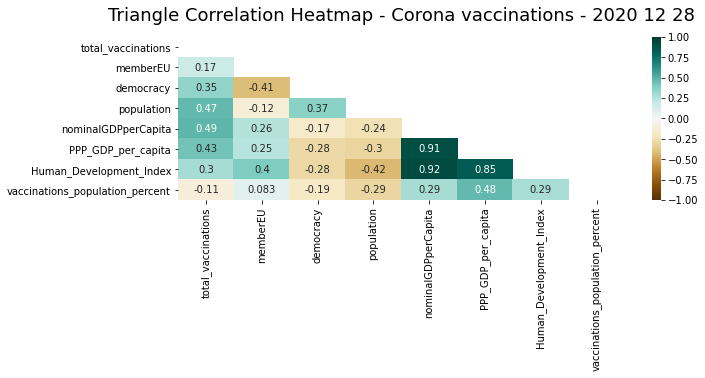

In [29]:
import numpy as np
plt.figure(figsize=(10, 3))
np.triu(np.ones_like(correlations))
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccinations - ' + start_time.strftime('%Y %m %d'), fontdict={'fontsize':18}, pad=16);
plt.savefig('Correlation_heatmap.png', dpi=300, bbox_inches='tight')

In [30]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent"}]

,total_vaccinations,population,continent,vaccinations_population_percent
country,,,,
Bahrain,51556,1492584,Asia,3.454144
Israel,279300,9093000,Asia,3.071594
United Kingdom,800000,66022273,Europe,1.211712
United States of America,1944585,328239523,North America,0.592429
Russia,700000,146804372,Europe,0.476825
Canada,43525,37894799,North America,0.114857
People's Republic of China,1000000,1409517397,Asia,0.070946
Chile,8324,18054726,South America,0.046104
Mexico,2924,130526945,North America,0.002240


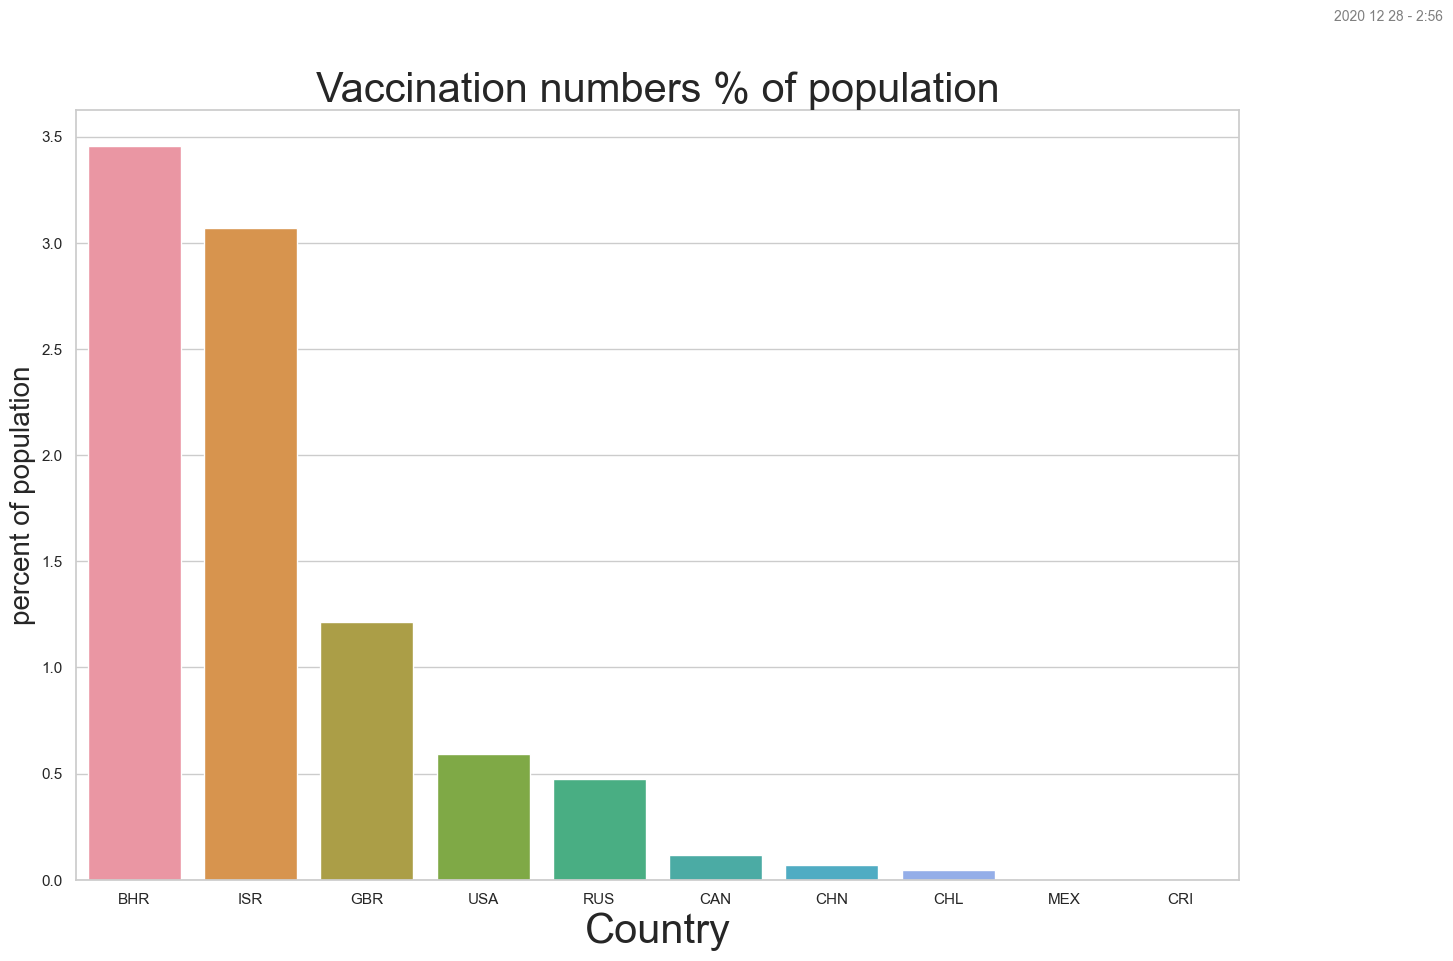

In [40]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1, fontsize=10,color = 'gray')
plt.savefig("Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")

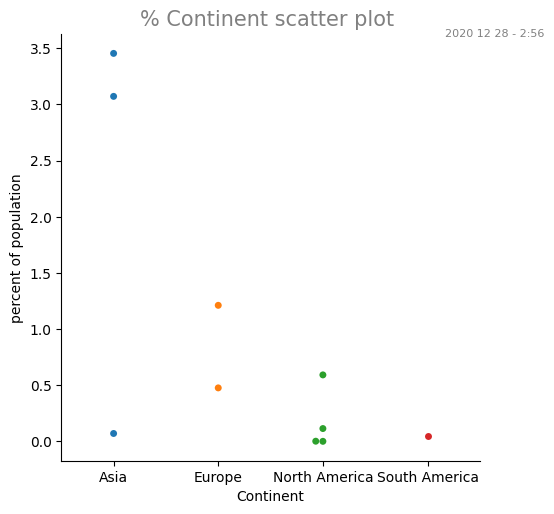

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% Continent scatter plot " , fontsize=15, y=0.9 , color = 'gray')
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1, fontsize=8,color = 'gray')

plt.savefig("Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
